In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# 1) Load dataset
data = load_diabetes(as_frame=True)
df = data.frame
print("Raw Shape:", df.shape)
print(df.head())

print("\nMissing Values:\n", df.isnull().sum())

Raw Shape: (442, 11)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Missing Values:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [3]:
# 3) Features + Target
X = df.drop("target", axis=1)
y = df["target"]

In [4]:
# 5) Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 6) Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [6]:
# 7) Model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# 8) Predict
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"\nMSE: {mse:.4f}    R²: {r2:.4f}")


MSE: 2900.1936    R²: 0.4526


In [8]:
# 9) Table
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
results["Error"] = results["Actual"] - results["Predicted"]
print(results.head())

   Actual   Predicted       Error
0   219.0  139.547558   79.452442
1    70.0  179.517208 -109.517208
2   202.0  134.038756   67.961244
3   230.0  291.417029  -61.417029
4   111.0  123.789659  -12.789659


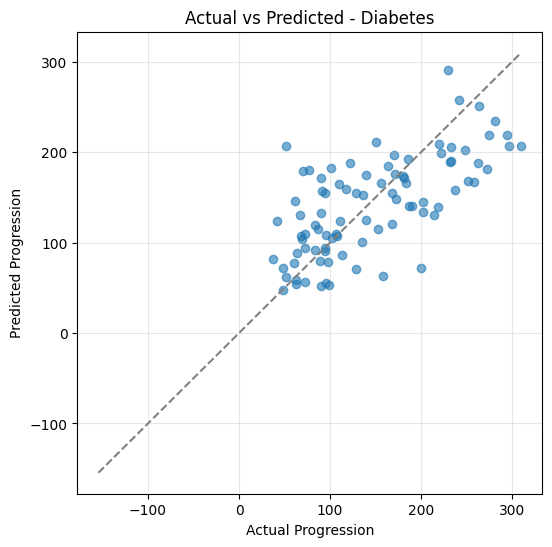

In [9]:
# 10) Plot
plt.figure(figsize=(6,6))
plt.scatter(results["Actual"], results["Predicted"], alpha=0.6)
plt.plot([results.min().min(), results.max().max()],
         [results.min().min(), results.max().max()],
         "--", color="gray")
plt.xlabel("Actual Progression")
plt.ylabel("Predicted Progression")
plt.title("Actual vs Predicted - Diabetes")
plt.grid(alpha=0.3)
plt.show()